In [2]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt

Se carga el archivo 'Buscador_Instituciones_2022'

In [69]:
ruta_instituciones = os.path.join('Buscador_Instituciones_2022_.xlsx')
instituciones= pd.read_excel(ruta_instituciones)
#https://stackoverflow.com/questions/31328861/python-pandas-replacing-header-with-top-row
header_inst = instituciones.iloc[1] 
instituciones = instituciones[2:] 
instituciones.columns = header_inst
instituciones['Tipo de institución'] = instituciones['Tipo de institución'].dropna()
instituciones = instituciones.dropna(subset=['ID'])
instituciones['Municipal y Servicios locales'] = instituciones['Municipal y Servicios locales'].astype(np.float64)
instituciones['Subvencionado'] = instituciones['Subvencionado'].astype(np.float64)
instituciones['Particular Pagado'] = instituciones['Particular Pagado'].astype(np.float64)
instituciones['Administración Delegada'] = instituciones['Administración Delegada'].astype(np.float64)
instituciones['Municipal y Servicios locales'] = instituciones['Municipal y Servicios locales'] * 100
instituciones['Subvencionado'] = instituciones['Subvencionado'] * 100
instituciones['Particular Pagado'] = instituciones['Particular Pagado'] * 100
instituciones['Administración Delegada'] = instituciones['Administración Delegada'] * 100
instituciones


1,ID,Tipo de institución,Nombre institución,Situación de autonomía,Dirección,Página web,Acreditación,Años acreditación (31-12-2021),Período de acreditación (31-12-2021),Áreas obligatorias de acreditación,...,m² construidos ponderados,N° de volúmenes de biblioteca,N° de laboratorios y talleres,m² construidos laboratorios y talleres,N° de computadores,m² construidos por estudiante (jornada principal),Volúmenes por estudiante,Computadores por estudiante,m² construidos biblioteca,m² áreas verdes y esparcimiento
2,1,Universidades Privadas,Universidad Gabriela Mistral,Autónoma,"Avda. Ricardo Lyon Nº 1177 - Providencia, Sant...",www.ugm.cl,Acreditada,3,Desde 15 de diciembre de 2021 hasta 15 de dici...,Gestión Institucional y Docencia de Pregrado,...,11222.3,72121,33,1188.4,138,15.373014,75.20438,0.1439,1348,3537
3,2,Universidades Privadas,Universidad Finis Terrae,Autónoma,"Avda. Pedro de Valdivia Nº 1509 - Providencia,...",www.finisterrae.cl,Acreditada,4,Desde 19 de noviembre de 2019 hasta 19 de novi...,Gestión Institucional y Docencia de Pregrado,...,42657,70822,169,8609,627,5.443027,7.736727,0.068495,1653,7272
4,3,Universidades Privadas Cruch,Universidad Diego Portales,Autónoma,"Av. Manuel Rodríguez Sur Nº 415, Santiago",www.udp.cl,Acreditada,5,Desde 24 de octubre de 2018 hasta 24 de octubr...,Gestión Institucional y Docencia de Pregrado,...,133868.3,293807,115,7633.6,2756,8.748419,16.667064,0.156342,17794,27736
5,4,Universidades Privadas,Universidad Central de Chile,Autónoma,"Toesca Nº 1783, Santiago",www.ucentral.cl,Acreditación extendida,4,Desde 21 de diciembre de 2017 hasta 21 de dici...,Gestión Institucional y Docencia de Pregrado,...,89749.1,118169,91,6982.7,1060,9.061904,8.961702,0.080388,3162.7,21927.1
6,7,Universidades Privadas,Universidad Bolivariana,Autónoma,"Huérfanos Nº 1721 , Santiago",www.ubolivariana.cl,No Acreditada,NaN,NaN,NaN,...,11482.95,45901,32,1467,256,7.886544,14.457008,0.08063,668,6076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,914,Centros de Formación Técnica Estatales,Centro de Formación Técnica de la Región del M...,Autónoma,"Maria Auxiliadora Nº 380, Linares",www.cftmaule.cl,No Acreditada,NaN,NaN,NaN,...,1673,722,3,371,111,5.576667,1.372624,0.211027,42,0
133,916,Centros de Formación Técnica Estatales,Centro de Formación Técnica de la Región de La...,Autónoma,"Manuel Matta Nº 1055, Lautaro",www.cftaraucania.cl,No Acreditada,NaN,NaN,NaN,...,2054,0,5,357.9,96,11.60452,NaN,0.341637,0,4628
134,917,Centros de Formación Técnica Estatales,Centro de Formación Técnica de la Región de Lo...,Autónoma,"Calle Comercio Nº 230, La Unión",www.cftdelosrios.cl,No Acreditada,NaN,NaN,NaN,...,1025.6,0,3,156,87,5.513978,NaN,0.329545,0,1141.5
135,918,Centros de Formación Técnica Estatales,Centro de Formación Técnica de la Región de Lo...,Autónoma,"Vicente Pérez Rosales Nº 529, Llanquihue",www.aprendizajeeslibertad.cl/,No Acreditada,NaN,NaN,NaN,...,80,0,0,0,54,0.597015,NaN,0.402985,0,0


Se agrupa por tipo de institución, buscando el porcentaje que poseen de alumnos provenientes de colegios Municipales y Servicios Locales, Subvencionados, Particulares Pagados, y Administración Delegada.

In [53]:
tipo_institucion = instituciones.groupby('Tipo de institución').mean()
tipo_institucion

1,Municipal y Servicios locales,Subvencionado,Particular Pagado,Administración Delegada
Tipo de institución,,,,
Centros de Formación Técnica,42.430258,46.063856,8.020365,3.485521
Centros de Formación Técnica Estatales,60.956618,35.889489,0.864487,2.289406
Institutos Profesionales,33.962477,50.142350,10.650177,5.244996
Universidades Estatales Cruch,33.902602,56.548436,7.446698,2.102265
Universidades Privadas,25.417204,56.037622,15.096309,3.448865
Universidades Privadas Cruch,25.379634,49.927391,22.706269,1.986705


Se observa que en las universidades, predominan la cantidad de alumnos de colegios subvencionados, excepto en los CFT estatales, en donde predominan alumnos de colegio Municipales. Se observa que en las universidades privadas CRUCH es donde hay más alumnos de colegios particulares pagados en comparación a otras instituciones.

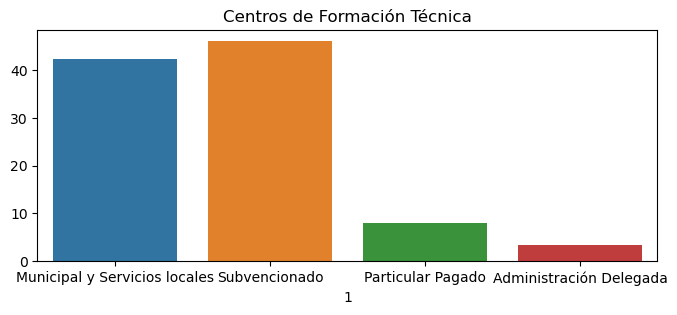

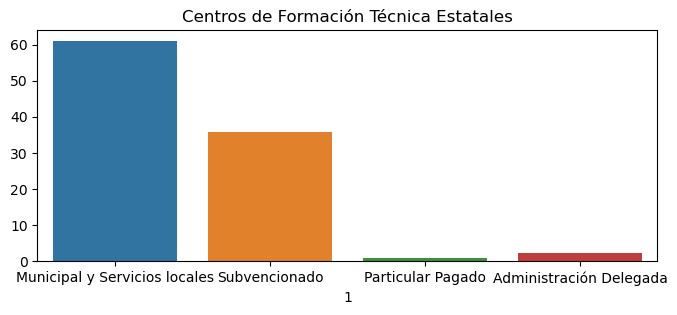

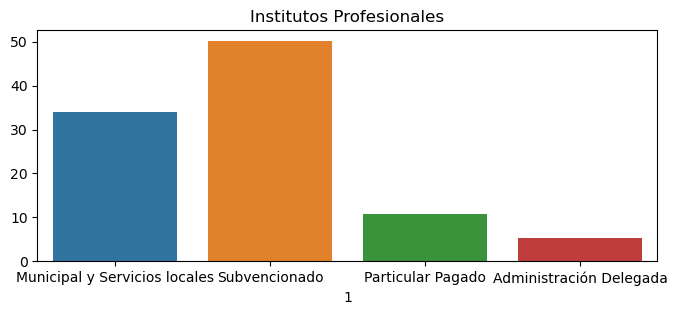

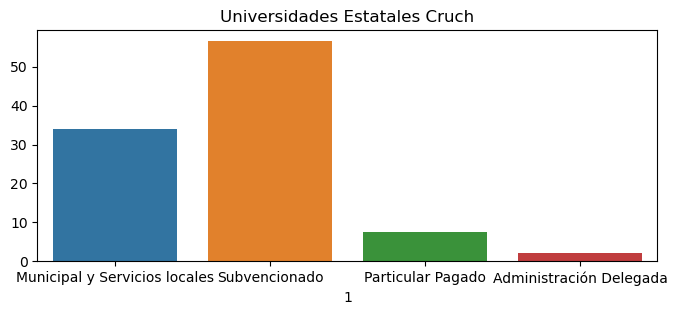

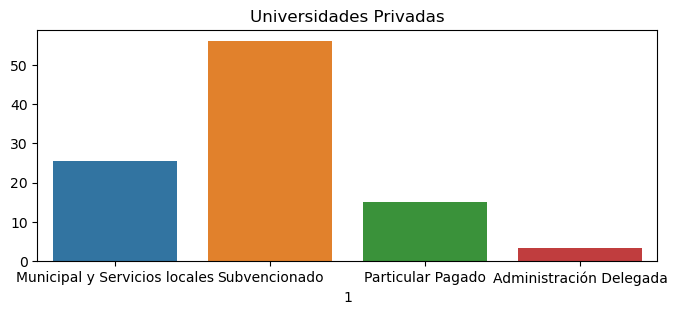

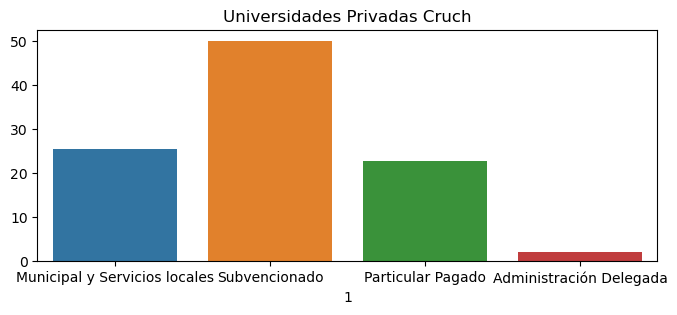

In [87]:
for indice in range(len(tipo_institucion.index)):
    fig, ax = plt.subplots(figsize = (8, 3))
    sns.barplot(data = tipo_institucion.iloc[[indice]], ci = None, ax = ax)
    ax.set_title(tipo_institucion.index[indice])

Buscaremos la distribución de cada alumno proveniente de ada tipo de colegio, pero esta vez en relación a universidades con 7 años de acreditación (o sea, máxima cantidad de años de acreditación)

In [101]:
universidades_7 = instituciones[instituciones['Años acreditación (31-12-2021)'] == 7]
universidades_7 = universidades_7[universidades_7['Tipo de institución'].str.contains('Universidades') == True]
universidades_7 = universidades_7.groupby('Nombre institución').mean()
universidades_7
 

1,Municipal y Servicios locales,Subvencionado,Particular Pagado,Administración Delegada
Nombre institución,,,,
Pontificia Universidad Católica de Chile,11.203306,27.277756,61.050371,0.468567
Universidad de Chile,27.139595,39.928633,32.143877,0.787896
Universidad de Concepción,28.756605,57.304140,11.715513,2.223743
Universidad de Santiago de Chile,26.260054,60.317248,9.754245,3.668454


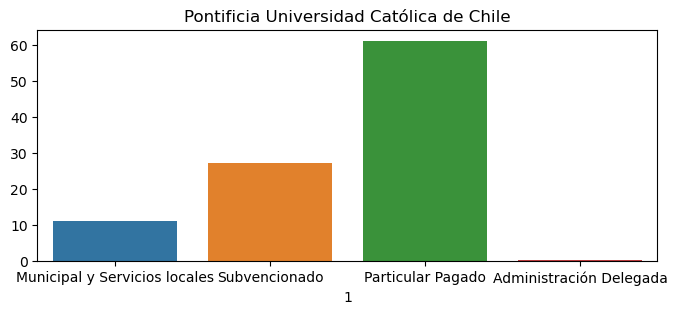

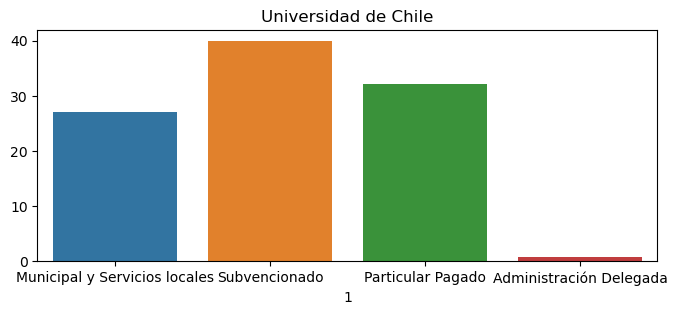

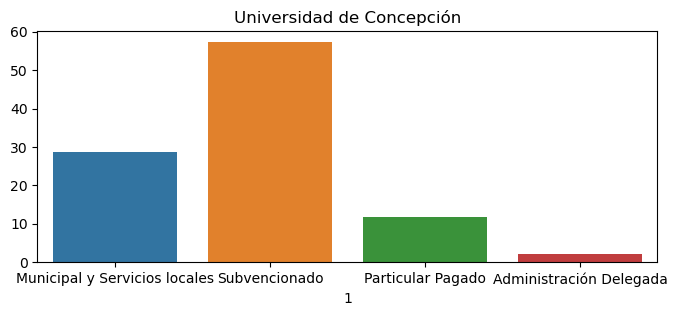

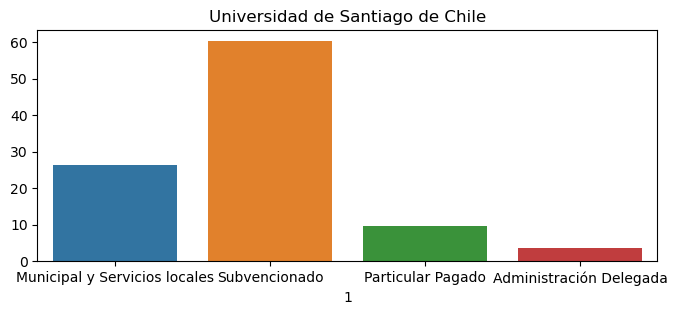

In [102]:
for indice in range(len(universidades_7.index)):
    fig, ax = plt.subplots(figsize = (8, 3))
    sns.barplot(data = universidades_7.iloc[[indice]], ci = None, ax = ax)
    ax.set_title(universidades_7.index[indice])